<a href="https://colab.research.google.com/gist/a3X3k/4cd13fc46836350fb24bac27143e0a63/ml-project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

In [ ]:
import warnings

warnings.filterwarnings('ignore')

## Importing Data Set

* Loading the data into the pandas data frame is certainly one of the most important steps in Exploratory Data Analysis.

In [ ]:
# Import Pandas

import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/preprocessed.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Descriptive Statistics

* Descriptive statistics analysis helps to describe the basic features of dataset and obtain a brief summary of the data.

* The describe() method in Pandas library helps us to have a brief summary of the dataset. 

* It automatically calculates basic statistics for all numerical variables excluding NaN (we will come to this part later) values.

```
Pandas head() method is used to return top n (5 by default) rows of a data frame or series. 
```

In [ ]:
# Display First 5 Records

data.head() 

,text,spam
0,Supply Quality China's EXCLUSIVE dimensions at...,1
1,over. SidLet me know. Thx.,0
2,"Dear Friend,Greetings to you.I wish to accost ...",1
3,MR. CHEUNG PUIHANG SENG BANK LTD.DES VOEUX RD....,1
4,Not a surprising assessment from Embassy.,0


```
The info() function is used to print a concise summary of a DataFrame. 

This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage. 
```

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17689 entries, 0 to 17688
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    17688 non-null  object
 1   spam    17689 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 276.5+ KB


```
Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.
```

In [ ]:
data.describe()

,spam
count,17689.000000
mean,0.399853
std,0.489882
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


```
The dtypes property is used to find the dtypes in the DataFrame. 

This returns a Series with the data type of each column. 

The result's index is the original DataFrame's columns. 

Columns with mixed types are stored with the object dtype.
```

In [ ]:
data.dtypes

text    object
spam     int64
dtype: object

In [ ]:
Spam =  data[data['spam']==1]

Ham =  data[data['spam']==0] 

print("No Of Spam Mails :", len(Spam))

print("No Of Ham Mails :", len(Ham))

No Of Spam Mails : 7073
No Of Ham Mails : 10616


```
The shape property returns a tuple representing the dimensionality of the DataFrame. 

The format of shape would be (rows, columns)
```

In [ ]:
# No of Rows

Rows = data.shape[0] 


# No of Columns

Columns = data.shape[1]


print("Rows :", Rows)
print("Columns :", Columns)


# Column Names

Column_Names = data.columns

Rows : 17689
Columns : 2


## Finding the Column which has only Null Values

```
Heatmaps visualize the data in a 2-dimensional format in the form of colored maps. 

The color maps use hue, saturation, or luminance to achieve color variation to display various details. 

This color variation gives visual cues to the readers about the magnitude of numeric values. 

HeatMaps is about replacing numbers with colors because the human brain understands visuals better than numbers, text, or any written data. 

Heatmaps can describe the density or intensity of variables, visualize patterns, variance, and even anomalies. 

Heatmaps show relationships between variables. 

These variables are plotted on both axes. We look for patterns in the cell by noticing the color change. 
```

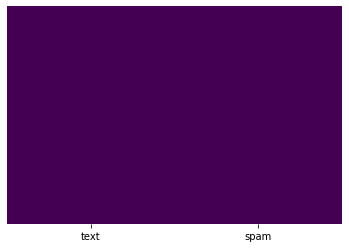

In [ ]:
# To Check missing value


# Import Seaborn

import seaborn as sn


# Heat Map Visualization

sn.heatmap(data.isnull(), cbar=False, yticklabels=False, cmap='viridis');

```
Pandas provides functions to check the number of missing values in the dataset. 

Missingno library takes it one step further and provides the distribution of missing values in the dataset by informative visualizations. 

Using the plots of missingno, we are able to see where the missing values are located in each column and if there is a correlation between missing values of different columns. 

Before handling missing values, it is very important to explore them in the dataset. 
```

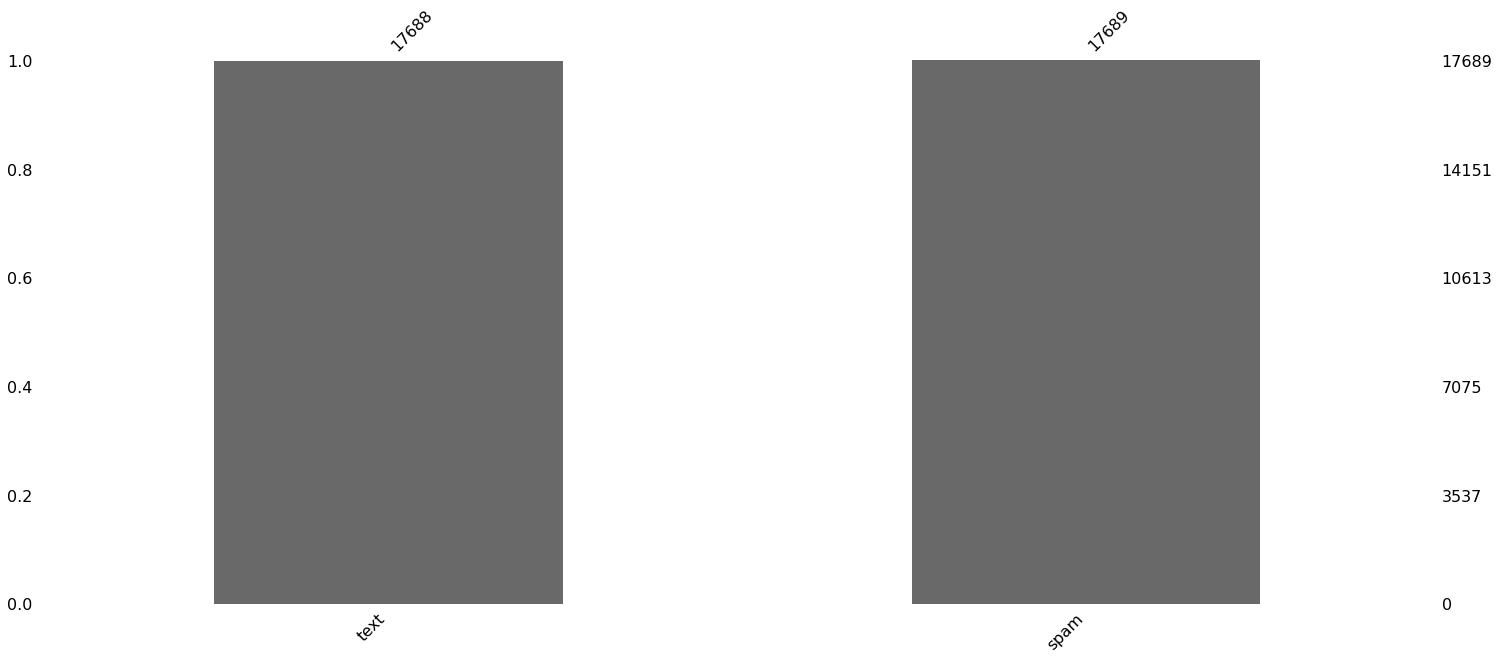

In [ ]:
# Import missingno Library

import missingno as msno


# Plot the Bar Graph

msno.bar(data);

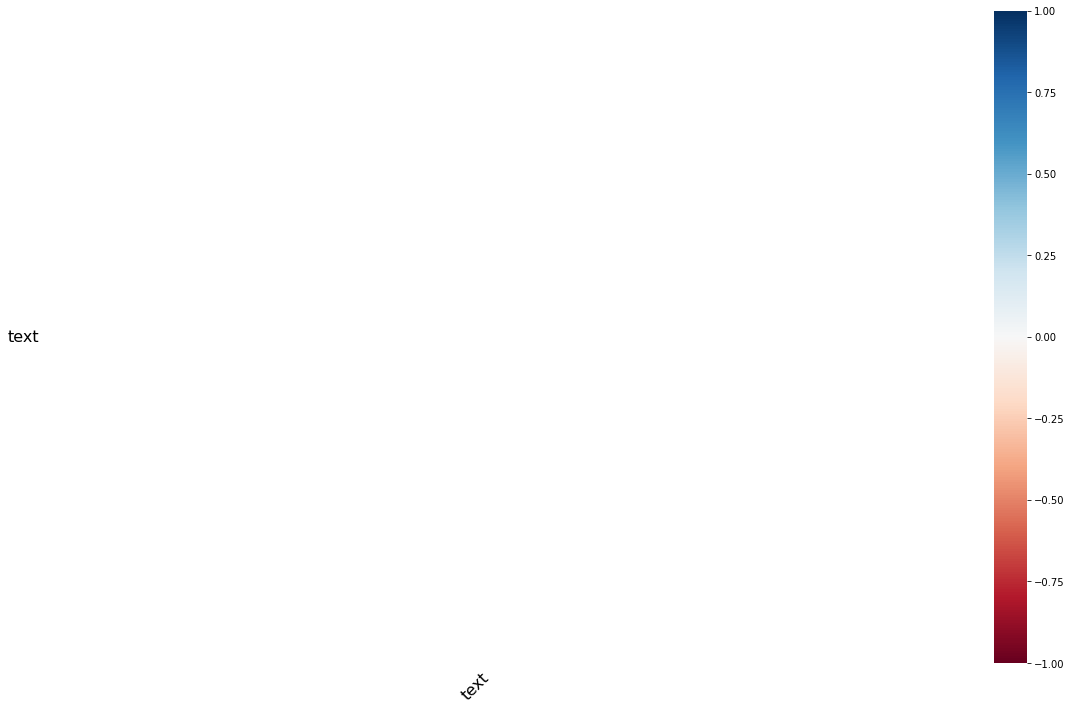

In [ ]:
# Plot the Heat Map

msno.heatmap(data);

In [ ]:
# Find the Number of Rows that has Nan Value in it

data.isnull().sum()

text    1
spam    0
dtype: int64

In [ ]:
# Find the No of Non NA cells for each column or row

data.count()

text    17688
spam    17689
dtype: int64

In [ ]:
# Find the Number of Rows that has Nan Value in it

Null_Data = data.isnull().sum()


# List for storing the Null Column Names

Null_Columns = []



for i in range(len(Null_Data)):


  # If the number of Null Values in the Row is equal to the total number of Records, then it means that the whole column contains NUll value in it. 

  if Null_Data[i] == Rows - 1 or Null_Data[i] == Rows:
    
    Null_Columns.append(Column_Names[i])


# Print all Columns which has only NULL values

print(Null_Columns)

[]


```
It's evident that there is no column in the dataset which has only NULL values.
```

## Dropping the Column which has only Null values

In [ ]:
# Delete all NULL Columns which has only NULL values

for i in Null_Columns:

  del data[i]

In [ ]:
data

,text,spam
0,Supply Quality China's EXCLUSIVE dimensions at...,1
1,over. SidLet me know. Thx.,0
2,"Dear Friend,Greetings to you.I wish to accost ...",1
3,MR. CHEUNG PUIHANG SENG BANK LTD.DES VOEUX RD....,1
4,Not a surprising assessment from Embassy.,0
...,...,...
17684,From ilug-admin@linux.ie Mon Jul 22 18:12:45 2...,0
17685,From fork-admin@xent.com Mon Oct 7 20:37:02 20...,0
17686,Received: from hq.pro-ns.net (localhost [127.0...,1
17687,From razor-users-admin@lists.sourceforge.net T...,0


## Finding Rows with any Null Values

In [ ]:
data.isnull().any()

text     True
spam    False
dtype: bool

In [ ]:
data.isnull().sum()

text    1
spam    0
dtype: int64

In [ ]:
# Display the Rows which has one or more NULL values in it

data[data.isnull().any(axis=1)]

,text,spam
5112,NaN,1


## Dropping the rows with Null values

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().any()

text    False
spam    False
dtype: bool

In [ ]:
print(data.isnull().sum()) 

text    0
spam    0
dtype: int64


## Dropping the Duplicate rows

In [ ]:
data.shape

(17688, 2)

In [ ]:
# Check if there is any Duplicate Rows

duplicate = data[data.duplicated()]

print("Number of Duplicate rows: ", duplicate.shape)

Number of Duplicate rows:  (2136, 2)


In [ ]:
data.count()  

text    17688
spam    17688
dtype: int64

In [ ]:
# Drop all the Duplicate Rows

data = data.drop_duplicates()

In [ ]:
data.count()

text    15552
spam    15552
dtype: int64

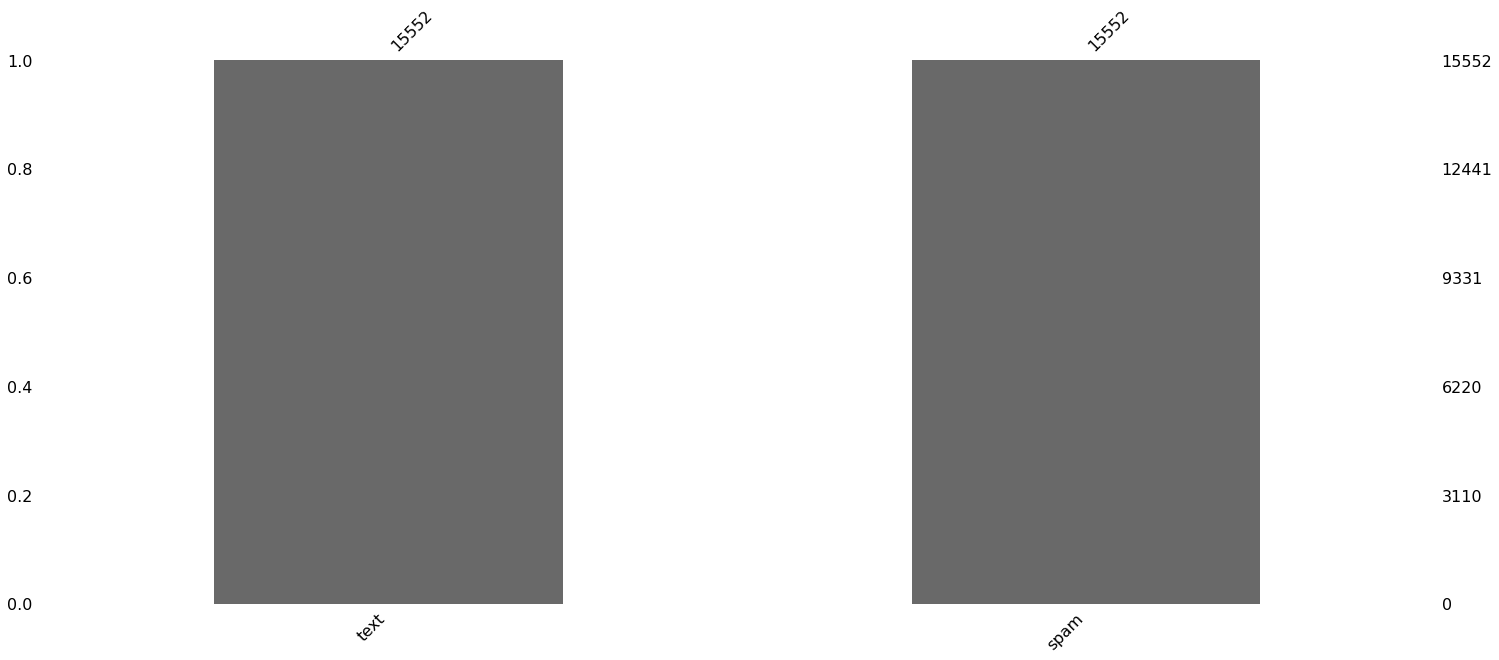

In [ ]:
# Plot the MSNO Bar Graph to find the number of NULL values

msno.bar(data);

In [ ]:
data.groupby('spam').describe()

text                                                               
     count unique                                                top freq
spam                                                                     
0     9536   9536  I like the idea of it being issued by someone ...    1
1     6016   6016  TXkgRGVhciBGcmllbmQKCkkgYW0gTXJzLlNhdmltYmksIH...    1

# Words Stemming and Lemmatization

```
Tokenization is the process by which a large quantity of text is divided into smaller parts called tokens. 

These tokens are very useful for finding patterns and are considered as a base step for stemming and lemmatization. 

Tokenization also helps to substitute sensitive data elements with non-sensitive data elements.

We use the method word_tokenize() to split a sentence into words. 

The output of word tokenization can be converted to Data Frame for better text understanding in machine learning applications. 

It can also be provided as input for further text cleaning steps such as punctuation removal, numeric character removal or stemming. 

Machine learning models need numeric data to be trained and make a prediction.
```

## Adding the Text Length Column for each Records

In [ ]:
# Store the Length of the messages in the New Column with respective to each of the records

data['Length'] = data['text'].apply(len)

data['Length'].max()

31636

In [ ]:
data.describe()

,spam,Length
count,15552.000000,15552.000000
mean,0.386831,2183.796232
std,0.487040,2791.350372
min,0.000000,1.000000
25%,0.000000,148.000000
50%,0.000000,1645.500000
75%,1.000000,3215.000000
max,1.000000,31636.000000


In [ ]:
# See the different classes of values in the Spam Column

data.groupby('spam').describe()

Length                                                                 
       count         mean          std  min     25%     50%      75%      max
spam                                                                         
0     9536.0  1614.970638  2360.142401  1.0    76.0   299.0  2940.00  31204.0
1     6016.0  3085.445312  3160.407445  1.0  1563.0  2499.0  3472.25  31636.0

## Plotting the Length of Spam & Ham Texts

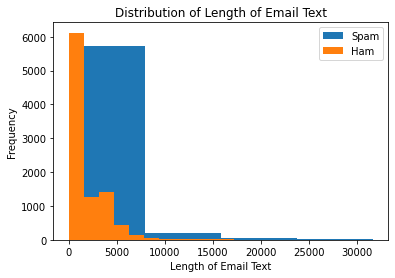

In [ ]:
# Import Matplotlib Library

import matplotlib.pyplot as plt 


# Split the Spam & Ham Records

Spam_Length =  data[data['spam']==1]

Ham_Length =  data[data['spam']==0] 


# Plot the Length of Spam & Ham Messages

Spam_Length['Length'].plot(bins=4, kind='hist',label = 'Spam') 

Ham_Length['Length'].plot(bins=20, kind='hist',label = 'Ham') 

plt.title('Distribution of Length of Email Text')

plt.xlabel('Length of Email Text')

plt.legend();

```
It's evident that Length of characters of ham emails is more as compared to spam emails
```

## Word Tokenization

```
Count the max word length used in any spam or ham email. 
```

In [ ]:
# Import NLTK Library

import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize


# Finding the length of all Ham & Spam texts

Ham_Words_Length = [len(word_tokenize(title)) for title in data[data['spam']==0].text.values]

Spam_Words_Length = [len(word_tokenize(title)) for title in data[data['spam']==1].text.values]

print("\nHam Words Length :", max(Ham_Words_Length,default = 0))

print("\nSpam Words Length :", max(Spam_Words_Length,default = 0))


# Check which has the highest length

if max(Ham_Words_Length,default = 0) > max(Spam_Words_Length,default = 0):

  print("\nHam Text Length is Larger")

else:

  print("\nSpam Text Length is Larger")


Ham Words Length : 5663

Spam Words Length : 7468

Spam Text Length is Larger


```
For ham email, the maximum number of ham words used in an email is 5663.

For spam email, the maximum number of spam words used in an email is 7468.

It's evident that the spam emails have less words as compared to ham emails.
```

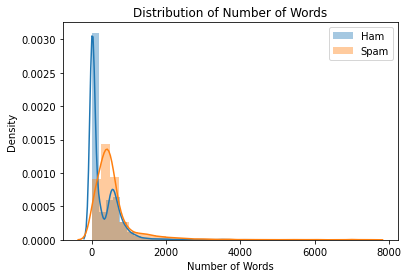

In [ ]:
# Plot the Spam & Ham record's length after tonkenizing it using word_tokenize function

ax = sn.distplot(Ham_Words_Length, norm_hist = True, bins = 30, label = 'Ham')

ax = sn.distplot(Spam_Words_Length, norm_hist = True, bins = 30, label = 'Spam')

print()

plt.title('Distribution of Number of Words')

plt.xlabel('Number of Words')

plt.legend()
                       
plt.show();

## Mean Word Length

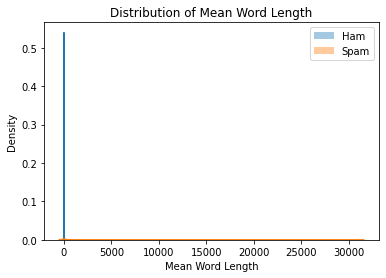

In [ ]:
import numpy as np


# Function to find the Mean Word Length

def Mean_Word_Length(x):

    length = np.array([])

    for word in word_tokenize(x):

        length = np.append(length, len(word))

    return length.mean()


Ham_Meanword_Length = data[data['spam']==0].text.apply(Mean_Word_Length)

Spam_Meanword_Length = data[data['spam']==1].text.apply(Mean_Word_Length)


# Plot the Graph of Distribution of the Mean Word Length

sn.distplot(Ham_Meanword_Length, norm_hist = True, bins = 30, label = 'Ham')

sn.distplot(Spam_Meanword_Length , norm_hist = True, bins = 30, label = 'Spam')

print()

plt.title('Distribution of Mean Word Length')

plt.xlabel('Mean Word Length')

plt.legend() 

plt.show()

## Stop Words Ratio

```
Stop Words are actually the most common words in any language (like articles, prepositions, pronouns, conjunctions, etc). They don't add much information to the text. 

Examples of a few stop words in English are “the”, “a”, “an”, “so”, “what”.

Stop words are available in abundance in any human language. By removing these words, we remove the low-level information from our text in order to give more focus to the important information. 

In order words, we can say that the removal of such words does not show any negative consequences on the model we train for our task.

Removal of stop words definitely reduces the dataset size and thus reduces the training time due to the fewer number of tokens involved in the training.

We do not always remove the stop words. The removal of stop words is highly dependent on the task we are performing and the goal we want to achieve. 

For example, if we are training a model that can perform the sentiment analysis task, we might not remove the stop words.

Movie review: “The movie was not good at all.” Text after removal of stop words: “movie good” 

We can clearly see that the review for the movie was negative. However, after the removal of stop words, the review became positive, which is not the reality. 

Thus, the removal of stop words can be problematic here. Tasks like text classification do not generally need stop words as the other words present in the dataset are more important and give the general idea of the text. So, we generally remove stop words in such tasks.
```

In [ ]:
nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


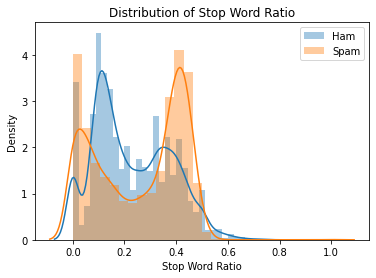

In [ ]:
# Check the ratio of Stop Words

# Both spam and ham email contain stopwords

Stop_Words_List = set(stopwords.words('english'))
    
def stop_words_ratio(x):

    total_words = 0

    stop_words = 0

    for word in word_tokenize(x):

        if word in Stop_Words_List:

            stop_words += 1
        
        total_words += 1


    if total_words != 0:
      return stop_words / total_words
    else:
      return 1


ham_stopwords = data[data['spam']==0].text.apply(stop_words_ratio)

spam_stopwords = data[data['spam']==1].text.apply(stop_words_ratio)

sn.distplot(ham_stopwords, norm_hist = True, label = 'Ham')

sn.distplot(spam_stopwords,  label = 'Spam')

plt.title('Distribution of Stop Word Ratio')

plt.xlabel('Stop Word Ratio')

plt.legend()

plt.show()

```
Spam emails contain stop words with a mean of 0.274

Ham emails contain stop words with a mean of 0.256
```

In [ ]:
spam_stopwords

0        0.265625
2        0.493119
3        0.449695
8        0.454082
12       0.000000
           ...   
17677    0.094752
17678    0.053241
17680    0.137313
17682    0.083832
17686    0.049383
Name: text, Length: 6016, dtype: float64

```
To construct a histogram, the first step is to “bin” the range of values — that is, divide the entire range of values into a series of intervals — and then count how many values fall into each interval. 

The bins are usually specified as consecutive, non-overlapping intervals of a variable. 

The bins (intervals) must be adjacent and are often (but are not required to be) of equal size.

The x-axis of the histogram denotes the number of bins while the y-axis represents the frequency of a particular bin. 

The number of bins is a parameter which can be varied based on how you want to visualize the distribution of your data.
```

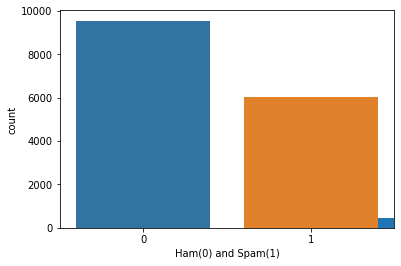

In [ ]:
# Divide the messages into spam and ham

ham = data.loc[data['spam']==0]

spam = data.loc[data['spam']==1]

spam['Length'].plot(bins=60, kind='hist') 

data['Ham(0) and Spam(1)'] = data['spam']

sn.countplot(data['Ham(0) and Spam(1)'], label = "Count");

In [ ]:
print("Spam percentage = {:.3f}%" .format((len(spam) / len(data) )*100))

print("Ham percentage = {:.3f}%" .format((len(ham) / len(data) )*100))

Spam percentage = 38.683%
Ham percentage = 61.317%


## Word Cloud Visualization

```
Word cloud is a technique for visualising frequent words in a text where the size of the words represents their frequency.

A word cloud (also called tag cloud or weighted list) is a visual representation of text data. Words are usually single words, and the importance of each is shown with font size or color. 

Python fortunately has a wordcloud library allowing to build them.

The wordcloud library is here to help you build a wordcloud in minutes using the WordCloud() Library.
```

In [ ]:
class Word_Cloud():

    def __init__(self):

        pass
    
    def variance_column(self, data):

        return variance(data)
    
    def word_cloud(self, data_frame_column, output_image_file):

        text = " ".join(review for review in data_frame_column)

        stopwords = set(STOPWORDS)

        stopwords.update(["subject"])

        wordcloud = WordCloud(width = 1200, height = 800, stopwords=stopwords, margin=0, max_words = 1000).generate(text)

        plt.imshow(wordcloud, interpolation='bilinear')

        plt.axis("off")

        plt.show()

        wordcloud.to_file(output_image_file)

        return 

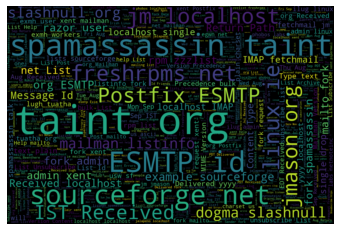

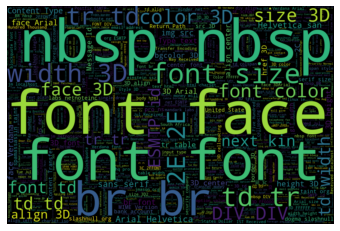

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from PIL import Image

word_cloud = Word_Cloud()

word_cloud.word_cloud(ham["text"], "Ham.png")

word_cloud.word_cloud(spam["text"], "Spam.png")

## Data Cleaning

In [ ]:
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

class Data_Clean():

    def __init__(self):

        pass

    

    def transform_text(self,text):

        text = text.lower()
        text = nltk.word_tokenize(text)
        
        y = []
        for i in text:
            if i.isalnum():
                y.append(i)
        
        text = y[:]
        y.clear()
        
        for i in text:
            if i not in stopwords.words('english') and i not in string.punctuation:
                y.append(i)
                
        text = y[:]
        y.clear()
        
        for i in text:
            y.append(ps.stem(i))
            
        return " ".join(y)

    
    def Clean(self, U_data):
      
      C_Data = U_data.apply(self.transform_text)
      
      return C_Data

In [ ]:
Cleaned_Data = Data_Clean()

data['Cleaned Text'] = Cleaned_Data.Clean(data['text'])

# Exporting the Processed Data to New CSV

In [ ]:
data.head()

,text,spam,Length,Ham(0) and Spam(1),Cleaned Text
0,Supply Quality China's EXCLUSIVE dimensions at...,1,1121,1,suppli qualiti china exclus dimens unbeat sir ...
1,over. SidLet me know. Thx.,0,26,0,sidlet know thx
2,"Dear Friend,Greetings to you.I wish to accost ...",1,2174,1,dear friend greet wish accost request would im...
3,MR. CHEUNG PUIHANG SENG BANK LTD.DES VOEUX RD....,1,3479,1,cheung puihang seng bank voeux rd branch centr...
4,Not a surprising assessment from Embassy.,0,41,0,surpris assess embassi


In [ ]:
data.to_csv("Processed.csv", index = False)

In [ ]:
# Store the Length of the messages in the New Column with respective to each of the records

data['Cleaned Text Length'] = data['Cleaned Text'].apply(len)

In [ ]:
data['Cleaned Text Length']

0         646
1          15
2         972
3        1745
4          22
         ... 
17684    1394
17685    1219
17686    1670
17687    2801
17688     378
Name: Cleaned Text Length, Length: 15552, dtype: int64

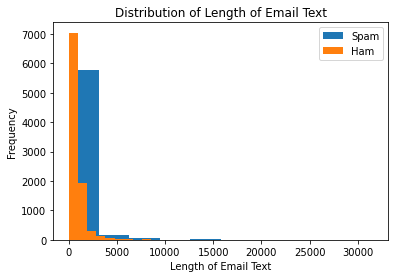

In [ ]:
# Import Matplotlib Library

import matplotlib.pyplot as plt 


# Split the Spam & Ham Records

Spam_Length =  data[data['spam']==1]

Ham_Length =  data[data['spam']==0] 


# Plot the Length of Spam & Ham Messages

Spam_Length['Cleaned Text Length'].plot(bins=10, kind='hist',label = 'Spam') 

Ham_Length['Cleaned Text Length'].plot(bins=20, kind='hist',label = 'Ham') 

plt.title('Distribution of Length of Email Text')

plt.xlabel('Length of Email Text')

plt.legend();

In [ ]:
import string
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
data = pd.read_csv("/content/Processed.csv") 

In [ ]:
data

,text,spam,Length,Ham(0) and Spam(1),Cleaned Text
0,Supply Quality China's EXCLUSIVE dimensions at...,1,1121,1,suppli qualiti china exclus dimens unbeat sir ...
1,over. SidLet me know. Thx.,0,26,0,sidlet know thx
2,"Dear Friend,Greetings to you.I wish to accost ...",1,2174,1,dear friend greet wish accost request would im...
3,MR. CHEUNG PUIHANG SENG BANK LTD.DES VOEUX RD....,1,3479,1,cheung puihang seng bank voeux rd branch centr...
4,Not a surprising assessment from Embassy.,0,41,0,surpris assess embassi
...,...,...,...,...,...
15547,From ilug-admin@linux.ie Mon Jul 22 18:12:45 2...,0,3732,0,mon jul 22 2002 yyyi receiv localhost localhos...
15548,From fork-admin@xent.com Mon Oct 7 20:37:02 20...,0,3334,0,mon oct 7 2002 yyyi receiv localhost jalapeno ...
15549,Received: from hq.pro-ns.net (localhost [127.0...,1,5050,1,receiv localhost esmtp id g6llbbcu047091 sun 2...
15550,From razor-users-admin@lists.sourceforge.net T...,0,8068,0,thu sep 12 2002 yyyi receiv localhost jalapeno...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(data['Cleaned Text'].values.astype('U')).toarray()
Y = data['spam'].values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import svm

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.2, random_state = 2 )jh

clf = svm.SVC(kernel = 'linear')

clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)

In [ ]:
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))

print("Precision:",metrics.precision_score(Y_test, Y_pred))

print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.9803921568627451
Precision: 0.984179850124896
Recall: 0.9656862745098039


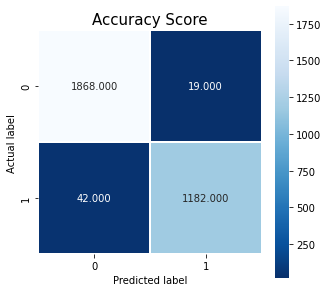

In [ ]:
from sklearn.metrics import confusion_matrix

import seaborn as sns

cm = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(5, 5))

sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');

plt.ylabel('Actual label');

plt.xlabel('Predicted label');

all_sample_title = 'Accuracy Score'

plt.title(all_sample_title, size = 15);